<a href="https://colab.research.google.com/github/andreeo/computer-vision/blob/main/qr_code_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#QR Code Detector

#Overview

In the world wherevery other person carries an Android phone or Iphone, QR Codes have gained a lot of popularity. The amount of information that these small and strange looking codes can carry is huge. Whether it's a URL, or a coupon code, or a person's PayTM account details, or a package's information, these codes can store it all.

QR Code(Quick Response Code)were first designed in 1994 for automotive industry in Japan and since then they have left their mark in about every sector.

## Outline

Now that we have discussed about the aim of this project, let's see what are the main steps to be followed in this project.

1. Read image
2. Detect QR Code in the image
3. Draw bounding box around the detected QR Code
4. Print the decoded text
5. Save and display the result image


#OpenCV functions to Use

First let's see what major OpenCV Functions you are going to use (or can use) in this project.

1. **Reading and writing image**: cv2.imread(), cv2.imwrite()
2. **Write text on image**: cv2.putText()
3. **Draw a line on image**: cv2.line()
4. **QR Detection**: cv2.QRCodeDetector(), detectAndDecode()

#Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip -qq drive/MyDrive/opencv-data/week1_python.zip  -d  /content/week1_python

Mounted at /content/drive
mapname:  conversion of  failed


In [26]:
imagePath = './week1_python/data/images/'

#Import libraries

In [270]:
import  cv2
import matplotlib.pyplot as plt
from IPython.display import Image
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

#Aim - Project1

In this project, we will implement a  **QR Code Detector and Decoder using OpenCV** from scratch. We will then run our QR Code Detector on a sample image attached below.

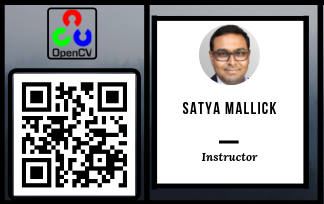

In [25]:
Image('./week1_python/data/images/IDCard-Satya.png')

#Additional Exercise - Project2

Create your own OpenCV ID Card(unofficial). You can use the following template as reference.

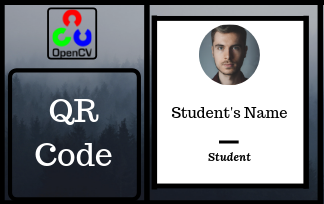

In [15]:
Image('./week1_python/data/images/IDCard-Template.png')

The QR Code  should contain the following details:

* Name: Your name will come here
* ID: a random numeric string


# Project1 Solution

## Step 1: Read Image

Execution Time: 0.003345


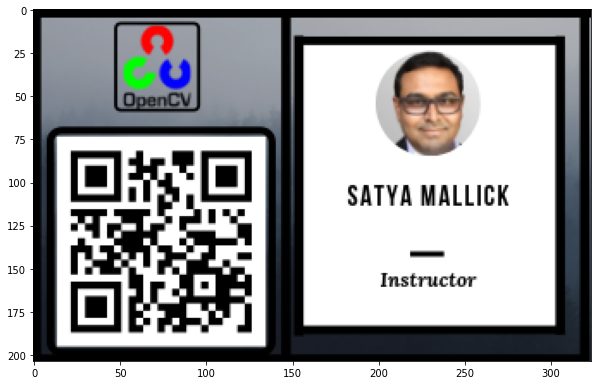

In [271]:
import time
start_time = time.time()
#read image
image = cv2.imread(imagePath + "IDCard-Satya.png", cv2.IMREAD_COLOR)
end_time = time.time()
#calculate time executation
total_time = end_time-start_time
print("Execution Time: {:.6f}".format(total_time))
plt.imshow(image[:,:,::-1]);

## Step 2: Dectect QR Code in the image

In [253]:
#create QRCodeDector object

qrDecoder =  cv2.QRCodeDetector()

opencvData, bbox, rectifiedImage = qrDecoder.detectAndDecode(image)
if opencvData != None:
    print("QR Code Detected")
else:
    print("QR Code Not Detected")

QR Code Detected


## Step 3: Draw a bouding box around the detected QR Code

(22.0, 82.0)
(126.0, 82.0)
(126.0, 187.35065)
(22.0, 186.0)


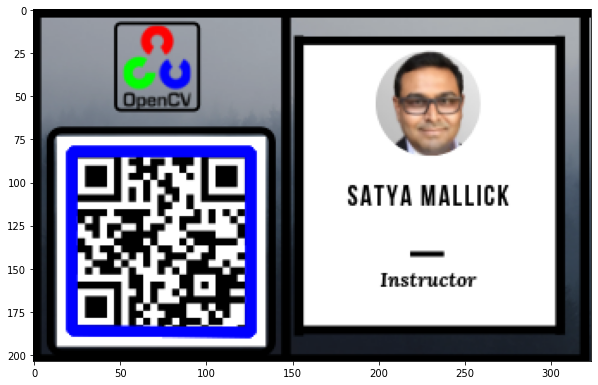

In [266]:
n = len(bbox)
coordenates = {}

for x in range(n):
  print(tuple(bbox[x][0]))
  cv2.line(image, tuple(bbox[x][0]), tuple(bbox[(x+1)%n][0]), (255,0,0), thickness=3, lineType=cv2.LINE_AA);

plt.imshow(image[:,:,::-1])

## Step 4: Print the Decoded Text

In [267]:
print("QR Code Detected!")
print(opencvData)

QR Code Detected!
Name: Satya, ID: 1234


## Step 5: Save and display the result image

Output Image saved


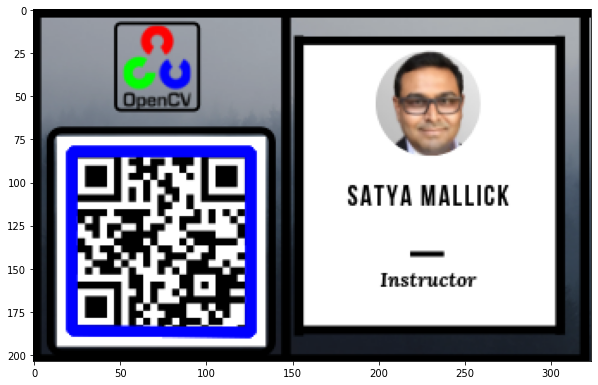

In [268]:
createdFile = cv2.imwrite("QRCode-Output.png", image)
if createdFile == True:
  print("Output Image saved")
  plt.imshow(image[:,:,::-1]);
else:
  print("Output Image Failed")


# Project2 Solution

In [272]:
!pip install qrcode

     |████████████████████████████████| 43 kB 1.0 MB/s 
  Created wheel for qrcode: filename=qrcode-7.3.1-py3-none-any.whl size=40402 sha256=48403fbc58603abceb11676b37bc54b02c92e9117024a8623bba9f7993b63282
  Stored in directory: /root/.cache/pip/wheels/93/d7/39/a4111be2cfb8e679938aa671a37888b6afb1f9e7d748e94492
Successfully built qrcode


In [299]:
import qrcode
qr = qrcode.QRCode(
    version=1,
    box_size=10,
    border=4,
)
qr.add_data('Name: Andrew\n')
qr.add_data('ID: 23549423')
qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white")
img.save('customQR.png')

In [300]:
img = cv2.imread('./customQR.png')
qr = cv2.QRCodeDetector()
opencvData, bbox, rectifiedImage = qr.detectAndDecode(img)
if opencvData != None:
    print("QR Code Detected")
    print("Data\n----\n{}".format(opencvData))
else:
    print("QR Code Not Detected")

QR Code Detected
Data
----
Name: Andrew
ID: 23549423
